In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit

In [26]:
@njit
def F(tt, y):  # правая часть дифференциального уравнения
    f = np.empty(8, np.float64)
    d = ((y[0] - y[4]) ** 2 + (y[1] - y[5]) ** 2) ** -1.5
    f[0] = y[2]
    f[1] = y[3]
    f[2] = k * q1 * q2 * d * (y[0] - y[4]) / m1
    f[3] = k * q1 * q2 * d * (y[1] - y[5]) / m1
    f[4] = y[6]
    f[5] = y[7]
    f[6] = k * q1 * q2 * d * (-y[0] + y[4]) / m2
    f[7] = k * q1 * q2 * d * (-y[1] + y[5]) / m2
    return f


@njit
def StepRK(tt, y, hh):
    y1 = hh * F(tt, y)
    y2 = hh * F(tt + hh / 2, y + y1 / 2)
    y3 = hh * F(tt + hh / 2, y + y2 / 2)
    y4 = hh * F(tt + hh, y + y3)
    Y = y + (y1 + 2 * y2 + 2 * y3 + y4) / 6
    return Y


@njit
def Solve(u, h, N):
    for i in range(1, N):
        u[:, i] = StepRK(i * h, u[:, i - 1], h)
    return u

In [27]:
mp = 1.673 * 10**-27
m1, m2 = 64 * mp, 28 * mp
e = 1.6 * 10**-19
k = 9 * 10**9
q1, q2 = 29 * e, 14 * e
p, L, Vx = 2 * 10**-9, 10**-8, 2 * 10**4

h = 10**-17  # шаг
t0, t = 0, 10**-12  # рассматриваемая область по t
N = int((t - t0) / h)  # количество шагов по x и t
u = np.zeros((8, N), np.float64)  # массив для записи решения
u[0, 0] = 0  # начальное условие по x1
u[1, 0] = p  # начальное условие по y1
u[2, 0] = Vx  # начальное условие по Vx1
u[3, 0] = 0  # начальное условие по Vy1
u[4, 0] = (L**2 - p**2) ** 0.5  # начальное условие по x2
u[5, 0] = 0  # начальное условие по y2
u[6, 0] = 0  # начальное условие по Vx2
u[7, 0] = 0  # начальное условие по Vy2

In [30]:
u = Solve(u, h, N)  # поиск численного решения

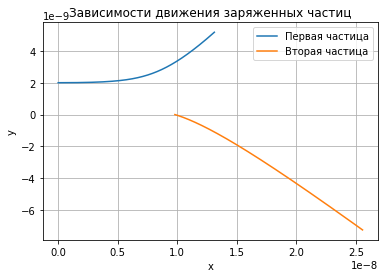

In [31]:
fig2, ax2 = plt.subplots()
ax2.plot(u[0, :], u[1, :], label="Первая частица")
ax2.plot(u[4, :], u[5, :], label="Вторая частица")

ax2.set(xlabel="x", ylabel="y", title="Зависимости движения заряженных частиц")
ax2.grid()
ax2.legend()
plt.show()